<a href="https://colab.research.google.com/github/Sahanduiuc/-House-Prices-Advanced-Regression-Techniques/blob/master/Mean_Variance_Rough_AMP20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Markowitz portfolio selection for multivariate affine and quadratic Volterra models
This notebook is a complementary material of [AMP20](https://www.researchgate.net/publication/342360640_Markowitz_portfolio_selection_for_multivariate_affine_and_quadratic_Volterra_models). Here we show how to implement the quadratic Stein-Stein model, and the infinite dimensional $L^2$ operators involved. For further details we refer to [AMP20](https://www.researchgate.net/publication/342360640_Markowitz_portfolio_selection_for_multivariate_affine_and_quadratic_Volterra_models). The code is far from being optimized as it could be dramatically improved by substituting the numerous for loops with tensor operations. If you have any question on anything about the code or the paper don't hesitate to contact me at enzo.miller@polytechnique.org.


## The model : Rough Stein-Stein for 2 assets

---



We consider two stocks $S^1$ and $S^2$ with the following  dynamics

\begin{equation}
\begin{cases}
dS^i_t &= \; S^i_t \theta_i (Y^i_t)^2     dt + S^i_t Y^i_t d\tilde B^i_t, \\
\; Y^i_t &=  \;  Y^i_0 +  \frac{1}{\Gamma(H_i+1/2)}  \int_0^t {(t-s)^{H_i-1/2}} \eta_i dW_s^i,
\quad i=1,2,
\end{cases}
\end{equation}
with $H^i>0$, $\eta_i \geq 0$, $\theta_i \geq 0$ and $Y^i_0\in \mathbb{R}$ and 
\begin{align*}
\tilde B^1 = B^1, \quad \tilde B^2 = \rho B^1 + \sqrt{1-\rho^2} B^2, \quad 
W^i=c_i \tilde B^i + \sqrt{1-c_i^2} \tilde B^{i,\perp},
\end{align*}
where  $(B^1,B^2,B^{1,\perp},B^{2,\perp})$ is a four dimensional Brownian motion.


Let $\pi_t$ denote the vector of the amounts invested in the risky assets $(S^1, S^2)$ at time $t \in [0,T]$ in a self--financing strategy and set $\alpha = \sigma^\top \pi$ with 
\begin{align}
\sigma =
\begin{pmatrix}
Y_1 & 0 \\
Y_2 \rho & Y_2\sqrt{1-\rho^2}
\end{pmatrix}
, &&
\lambda = 
\begin{pmatrix}
1 & 0 \\
\rho & \sqrt{1-\rho^2}
\end{pmatrix}^{-1}
\begin{pmatrix}
\theta_1 Y^1 \\
\theta_2 Y_2
\end{pmatrix}
.\end{align}
 Then, the dynamics of the wealth $X^{\alpha}$ of the portfolio we seek to optimize are given by 
\begin{align}
dX^{\alpha}_t &= \left( \alpha_t^\top \lambda_t \right) dt + \alpha_t^\top dB_t, \; t \geq 0, \; X_0^\alpha = x_0 \in \mathbb{R}. 
%X_0^{\c} &= X_0.
\end{align} 

>In the following we assume the goal of the investor is to solve the Markowitz portfolio selection problem 
\begin{align} 
     V(m) &  = \; \inf_{\substack{\alpha}}\big\{ \mathbb{V} (X_T):   \text{s.t. } \mathbb{E}[X_T] = m \big\}. 
\end{align}

Following [AMP20](???), we shall compute the __efficient frontier__ which happens to be of the form 
\begin{equation}
  V(m) \; = \;    \mathbb{V} (X_T^*) \; = \;  \big|x_0 - m  \big|^2 \frac{\Gamma_0}{1 - \Gamma_0 },
\end{equation}
and the __optimal allocation strategy__ which takes the form :
\begin{equation}
        \alpha^{*}_t = \;  -    \Big( \big({ \Theta } + 2  C  \left[\boldsymbol{\Psi}_{t} \boldsymbol{K}\eta \right]^*  \big) g_t \Big)(t) \Big(X^{\alpha^*}_t - \xi^* \Big), 
\end{equation}
where
\begin{align}
\xi^* = \frac{m - X_0 \Gamma_0}{1-\Gamma_0}, && C = 
\begin{pmatrix}
c_1 && 0 \\
c_2 \rho && c_2 \sqrt{1-\rho^2}
\end{pmatrix}.
\end{align}



$\Gamma_0$ is the initial value of the process $t \mapsto \Gamma_t$ solution to a BSDE of Riccati type which appears to have an explicit closed form formula
\begin{equation}
\Gamma_t =   {\exp\left( \phi_{t}  + \langle g_t, \boldsymbol{\Psi}_{t} g_t \rangle_{L^2} \right)}.
\end{equation}
Here $t \mapsto \boldsymbol{\Psi}_{t}$ is the $L^2$-operator valued function defined as 
\begin{equation}
     \boldsymbol{\Psi}_t = - \Big(id - \boldsymbol{\hat{K}}\Big)^{-*} {\Theta^\top \Big(id + 2\Theta \tilde{\boldsymbol{\Sigma}}_t \Theta^\top\Big)^{-1} 
     \Theta}\Big(id - \boldsymbol{\hat{K}}\Big)^{-1}, \quad 0\leq t\leq T,
\end{equation}
where $\hat{K}$ is the $L^2$ operator induced by the kernel $\hat{K} = K(D-2\eta C^\top \Theta)$ and $\tilde{\boldsymbol{\Sigma}}$ is the $L^2$-operators defined as
\begin{equation}
\boldsymbol{\tilde{\Sigma}}_t = (id-\boldsymbol{\hat{K}})^{-1} \boldsymbol{\Sigma}_t (id-\boldsymbol{\hat{K}})^{-*}, \qquad t \in [0,T],
\end{equation}
where $\boldsymbol{\Sigma}$ is the $L^2$ operator induced by the kernel
\begin{equation}
{\Sigma}_t(s,u) = \int_t^{s \wedge u } K(s,z)\eta \big(U -  2 C^\top C \big) \eta^\top K(u,z)^\top  dz, \qquad t \in [0,T].
\end{equation}


##  Table of contents

1. [Code & Implementation of the $L^2$ operators](#code)
2. [Optimal Allocation](#optimalalloc)
  1. [$T \ll 1$](#smallT)
  2. [$T \approx 1$](#interT)
  3. [$T \gg 1$](#bigT)
3. [Adding correlation $\rho \neq 0$ between stocks](#correl)
  1. [$\rho > 0$ (buy rough sell smooth)](#correl_pos) 
  2. [$\rho < 0$](#correl_neg)
4. [Influence of the vol of vol $\eta$](#volvol)
  1. [$\eta \ll 1$](#small_eta) 
  2. [$\eta \gg 1$](#big_eta) 
5. [Efficient frontier](#frontier)

If you're not interested into the implementation details you can directly skip the first part and jump to the following ones.

## Code & Implementation of the $L^2$ operators <a name="code"></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from scipy.special import gamma
from numpy.linalg import inv
from numpy.random import multivariate_normal, normal
from scipy.integrate import odeint, solve_ivp
from scipy.linalg import block_diag 
from google.colab import files

In [ ]:
# parameters/objects that won't change through the notebook
c_1 = -0.7 # leverage effect
c_2 = -0.7 # leverage effect
N = 40 # numbers of timesteps 
Y0 = np.sqrt(0.4) 
X0 = 1
id_op = np.identity(2*N)

In [ ]:
class Operator:
  def __init__(self, rho, H1, H2, T, eta1=1):
    self.T = T
    self.t = np.linspace(0,T,N)
    self.H1 = H1 # 0.05
    self.H2 = H2 # 0.1-> 1
    self.rho = rho # < > 0
    self.eta_1 = eta1
    eta_2 = self.eta_1 
    self.eta = np.matrix([[self.eta_1,0],[0, eta_2]])
    self.beta = np.matrix([[1,0], [rho, np.sqrt(1-rho**2)]])
    self.C = c_1 * self.beta
    self.Theta = inv(self.beta).dot(np.matrix([[1,0], [0,1]])) * 0.5  
    self.U = np.identity(2) + pow(c_1,2) * np.matrix([[0, rho], [rho, 0]])

    self.C_op = np.kron(np.eye(N), self.C)
    self.sig_op = self.sigma_op()
    self.K_op = self.K_op()
    self.K_hat_op = self.K_op.dot(np.kron(np.eye(N), -2 * (self.eta).dot(self.C.T).dot(self.Theta)))
    self.Theta_op = np.kron(np.eye(N), self.Theta)
    self.Psi_op = self.Psi_op()
    self.eta_op = np.kron(np.eye(N), self.eta)
    self.U_op = np.kron(np.eye(N), self.U)
    self.gamma0_ = self.gamma0()


  def K_kernel(self, s, u):
    if u >= s:
      return np.zeros([2, 2])
    else:
      res = np.matrix([[pow(s-u, self.H1 - 0.5) / gamma(self.H1 + 0.5), 0],
                            [0, pow(s-u, self.H2 - 0.5) / gamma(self.H2 + 0.5)]])
      return res 


  def K_op(self):
    K_matrix = np.zeros([2*N, 2*N])
    for i in range(N):
      for j in range(N):
        K_matrix[2*i:2*i+2, 2*j:2*j+2] = self.K_kernel(self.t[i], self.t[j])
    return K_matrix  


  def sigma_op(self):

    def Sigma_integrand(z, y, s, u):
      temp = self.eta.T.dot((self.U - 2 * (self.C).T.dot(self.C)).dot(self.eta))
      temp_integrand = self.K_kernel(s,z).dot(temp).dot(self.K_kernel(u,z).T)
      dydt = np.squeeze(np.asarray(temp_integrand.flatten())).tolist()
      return dydt

    sig = np.zeros([N, 2*N, 2*N])
    sig0 = [0,0,0,0]
    for i in range(N):
      for j in range(N):
        sig_su = solve_ivp(Sigma_integrand, [0,self.T], sig0, args=(self.t[i], self.t[j]), dense_output=True, method='RK23')
        sig_su = sig_su.sol(self.t).T[-1] - sig_su.sol(self.t).T
        sig[:, i:i+2, j:j+2] = np.reshape(sig_su, [N, 2, 2])
    return sig  


  def Psi_op(self):
    psi_op = np.zeros([N,2*N,2*N])
    for i in range(N):
      idK = inv(id_op - self.K_hat_op * self.T/N)
      sigma_t_tilde = idK.dot(self.sig_op[i,:,:]).dot(idK.T)
      temp_a = inv(id_op + 2 * self.Theta_op.dot(sigma_t_tilde).dot(self.Theta_op.T) * self.T/N)
      temp_b = self.Theta_op.dot(idK)
      psi_op[i,:,:] = - temp_b.T.dot(temp_a).dot(temp_b)
    return psi_op

    # Efficient frontier 
  def gamma0(self):

    def Phi_dot(r):
      def lambda_op(z):
        lambda_op = np.zeros([2*N,2*N])
        for i in range(N):
          for j in range(N):
            lambda_op[2*i:2*i+2, 2*j:2*j+2] = - self.K_kernel(self.t[i], self.t[z]).dot(self.eta).dot(self.U).dot(self.eta.T).dot(self.K_kernel(self.t[j], self.t[z]).T)
        return lambda_op
      def Phi_integrand(z):   
        temp1 = (self.Psi_op[z,:,:] + (self.Theta_op.T).dot(self.Theta_op)) * self.T/N
        temp2 = - (self.Theta_op.T).dot(self.Theta_op)
        return np.trace((temp1 + temp2).dot(lambda_op(z)))
      sol = 0
      for i in range(r, N):
        sol += (self.T/N)**2 * Phi_integrand(i)
      return sol

    def Phi0():
      phi_0 = 0
      for i in reversed(range(N)):
        phi_0 += Phi_dot(i) * self.T/N
      return -phi_0

    Phi0_ = Phi0()
    print("Phi0_ = ", Phi0_)
    g0 = np.ones(2*N) * Y0    
    return np.exp(Phi0_ + (g0).T.dot(self.Psi_op[0,:,:] + (self.Theta_op.T).dot(self.Theta_op)).dot(g0)* (self.T/N)**2 -  (g0).T.dot((self.Theta_op.T).dot(self.Theta_op)).dot(g0) * self.T/N )

  def efficient_frontier(self, delta_X_mean):
    print("Gamma_0(T={0}, H1={1}, H2={2}) = ".format(self.T, self.H1, self.H2), self.gamma0_)
    return (self.gamma0_ / (1 - self.gamma0_) * np.square(delta_X_mean)).T

In [ ]:
class Portfolio:
  def __init__(self, rho, H1, H2, T, eta1):
    self.m = X0 * (1.05)**T
    self.op = Operator(rho=rho, H1=H1, H2=H2, T=T, eta1=eta1)
    self.T = T
    self.t = np.linspace(0,T,N)
    self.H1 = H1
    self.H2 = H2
    self.n_factor = 20
    cte = 1/T * pow(self.n_factor, 0.8)
    self.etas = np.arange(1, self.n_factor + 1) * cte
    self.rho = rho
    self.coeff_c1 = self.coeff_c(H1)
    self.coeff_c2 = self.coeff_c(H2)
    self.coeff_gamma1 = self.coeff_gamma(H1)
    self.coeff_gamma2 = self.coeff_gamma(H2)
    self.C_T = np.array([[np.sqrt(1-c_1**2), 0], [0, np.sqrt(1-c_1**2)]])
    self.B_increments = normal(0, np.sqrt(T/N), [2, N])
    self.W_increments = self.op.C.dot(self.B_increments) + self.C_T.dot(normal(0, np.sqrt(T/N), [2,N]))

    self.g = self.draw_g()
    self.Y = self.from_g_to_y()

    self.xi = self.m - self.op.gamma0_ * (X0 - self.m) / (1 - self.op.gamma0_) 
    self.X = self.X_star()
    self.alpha = self.alpha_star()
    self.alpha_ones = self.alpha_star(True)
    self.A_ones = -self.A(ones=True)
    self.pi = self.pi_star()
    self.pi_ones = self.pi_star(ones=True)

  def mu(self, x, _, H):
    return pow(x, -H - 0.5) / (gamma(0.5 + H) * gamma(0.5 - H))

  def coeff_c(self, H):
    size = self.etas.shape[0]
    int_ = solve_ivp(self.mu, [1e-12, self.etas[-1]], [0], args=([H]), dense_output=True, method='RK23').sol(self.etas).T
    mat = np.diag(-np.ones(size-1), -1) + np.identity(size)
    return mat.dot(int_)

  def mu_E(self, x, _, H):
    return x * self.mu(x, _, H)

  def coeff_gamma(self, H):
    size = self.etas.shape[0]
    int_ = solve_ivp(self.mu_E, [1e-12, self.etas[-1]], [0], args=([H]), dense_output=True, method='RK23').sol(self.etas).T
    mat = np.diag(-np.ones(size-1), -1) + np.identity(size)
    return mat.dot(int_)


  def draw_g(self):
    def draw_OU(gammai):
      etaW = (self.op.eta).dot(self.W_increments)
      res = np.zeros([N, N, 2])
      for i in range(N):
        for j in range(i,N):
          int_ = np.zeros([2,1])
          for k in range(1, N):
            if k > i: break
            int_ += self.T/N * np.multiply(np.exp(-gammai*(self.t[j] - self.t[k])), etaW[:,k])
          res[i,j,:] = np.squeeze(int_)
      return res

    res = np.zeros([N, N, 2])
    for i in range(self.n_factor):
      gammai = np.array([self.coeff_gamma1[i], self.coeff_gamma2[i]])
      OU_i = draw_OU(gammai)
      res[:,:,0] += OU_i[:,:,0] * self.coeff_c1[i]
      res[:,:,1] += OU_i[:,:,1] * self.coeff_c2[i]

    for i in range(N):
        for j in range(i,N):
          res[i,j,:] += Y0

    return res

  def from_g_to_y(self):
    return np.array([self.g[i,i,:] for i in range(N)])

################
  # optimal allocation 
  def pre_alpha_op(self):
    pre_alpha_op = np.zeros([N, 2*N, 2*N])
    for i in range(N):
      temp1 = (self.op.Psi_op[i,:,:]  + (self.op.Theta_op.T).dot(self.op.Theta_op)).dot(self.op.K_op) * (self.T/N)**2
      temp2 = - (self.op.Theta_op.T).dot(self.op.Theta_op).dot(self.op.K_op) * self.T/N
      pre_alpha_op[i,:,:] = -(self.op.Theta_op + 2 * self.op.C_op.dot((temp1 + temp2).dot(self.op.eta_op) ).T) 
    return pre_alpha_op

  def A(self, ones=False):
    pre_alpha_op = self.pre_alpha_op()
    A = np.zeros([N, 2])
    for i in range(N):
      if ones:
        g_samples = np.ones([2*N]) * Y0
      else:
        g_samples = self.g[i,:,:].reshape([2 * N])
      A[i,:] = (pre_alpha_op[i,:,:].dot(g_samples))[2*i : 2*i+2]

    return A
###############

  def X_star(self):
    lambda_ = self.op.Theta.dot(self.Y.T).T 
    A = self.A()

    arg_exp =  np.zeros([N,])
    for i in range(1, N):
      incre_ = (lambda_[i,:].dot(A[i,:]) - A[i,:].dot(A[i,:]) / 2) * self.T/N + A[i,:].dot(self.B_increments[:,i])
      arg_exp[i] = arg_exp[i-1] + incre_

    X_tilde0 = X0 - self.xi
    print("xi = ", self.xi)
    X_tilde = X_tilde0 * np.exp(arg_exp)
    X = (X_tilde + self.xi).reshape([N,])
    return X

  def alpha_star(self, ones=False):
    A = self.A(ones)
    alpha = np.zeros([N,2])
    for i in range(N):
      if ones:
        alpha[i,:] = np.multiply(A[i,:],  (- self.xi))
      else:
        alpha[i,:] = np.multiply(A[i,:],  (self.X[:, i] - self.xi))
    return alpha 

  def pi_star(self, ones=False):
    pi = np.zeros([N,2])
    for i in range(N):
      if ones:
        pi[i,:] = np.matmul(inv(self.op.beta).T, self.alpha_ones[i,:]) / Y0
      else:
        pi[i,:] = np.matmul(inv(np.diag(self.Y[i,:]).dot(self.op.beta)).T, self.alpha[i,:]) # transpose because sigma is not symetric
    return pi

  def plot_portfolio(self):
    # X - riskless
    X = np.array(self.X).reshape([N,])
    pi_1 = self.pi[:,0]
    pi_2 = self.pi[:,1]
    non_risky = X - pi_1 - pi_2
    plt.plot(self.t, non_risky , color='brown',label='riskless asset')
    plt.plot(self.t, X, label=r'$X_t$')
    plt.axhline(y=self.m, linestyle='-', color='orange' ,label = r'$m = X_0 (1.05^T)$ = '+str(round(self.m, 2)))
    plt.xlabel('t')
    plt.legend(loc='best')
    plt.title(r"$t \mapsto X_t$")
    plt.savefig('X_T='+str(self.T)+'_eta='+str(self.op.eta_1)+'_rho='+str(self.rho)+'.pdf') 
    plt.show()
    # pi
    pi_1 = self.pi[:,0]
    pi_2 = self.pi[:,1]
    plt.plot(self.t, pi_1, 'b')
    plt.plot(self.t, pi_2, 'g')
    plt.plot([],[], 'b', label=r'$H1 = $' + str(self.H1))
    plt.plot([],[], 'g', label=r'$H2 = $' + str(self.H2))
    plt.legend(loc='best')
    plt.xlabel('t')
    plt.title(r"$t \mapsto \pi_t$ ")
    plt.grid()
    plt.savefig('pi_T='+str(self.T)+'_eta='+str(self.op.eta_1)+'_rho='+str(self.rho)+'.pdf') 
    plt.show()
    # alpha
    alpha_1 = self.alpha[:,0]
    alpha_2 = self.alpha[:,1]
    plt.plot(self.t, alpha_1, 'b')
    plt.plot(self.t, alpha_2, 'g')
    plt.plot([],[], 'b', label=r'$H1 = $' + str(self.H1))
    plt.plot([],[], 'g', label=r'$H2 = $' + str(self.H2))
    plt.legend(loc='best')
    plt.xlabel('t')
    plt.title(r"$t \mapsto \alpha_t$")
    plt.grid()
    plt.savefig('alpha_T='+str(self.T)+'_eta='+str(self.op.eta_1)+'_rho='+str(self.rho)+'.pdf') 
    plt.show()
    # alpha_ones
    alpha_1 = self.alpha_ones[:,0]
    alpha_2 = self.alpha_ones[:,1]
    plt.plot(self.t, alpha_1, 'b')
    plt.plot(self.t, alpha_2, 'g')
    plt.plot([],[], 'b', label=r'$H1 = $' + str(self.H1))
    plt.plot([],[], 'g', label=r'$H2 = $' + str(self.H2))
    plt.legend(loc='best')
    plt.xlabel('t')
    plt.title(r"$t \mapsto \;  ( ({ \Theta } + 2  C  [\Psi_{t} K\eta]^*) Y_0 )(t)(\xi)$")
    plt.grid()
    plt.savefig('alpha_Y0_T='+str(self.T)+'_eta='+str(self.op.eta_1)+'_rho='+str(self.rho)+'.pdf') 
    plt.show()
    # pi_ones
    pi_ones_1 = self.pi_ones[:,0]
    pi_ones_2 = self.pi_ones[:,1]
    plt.plot(self.t, pi_ones_1, 'b')
    plt.plot(self.t, pi_ones_2, 'g')
    plt.plot([],[], 'b', label=r'$H1 = $' + str(self.H1))
    plt.plot([],[], 'g', label=r'$H2 = $' + str(self.H2))
    plt.legend(loc='best')
    plt.xlabel('t')
    plt.title(r"$t \mapsto \;  (\beta^{-1})^\top( ({ \Theta } + 2  C  [\Psi_{t} K\eta]^*) 1 )(t)(\xi)$")
    plt.grid()
    plt.savefig('pi_ones_T='+str(self.T)+'_eta='+str(self.op.eta_1)+'_rho='+str(self.rho)+'.pdf') 
    plt.show()
    # Y

## Optimal allocation <a name="optimalalloc"></a>


Let's now study the optimal allocation strategy : 
\begin{equation}
        \alpha^{*}_t = \;  - \Big( \big({ \Theta } + 2  C  \left[\boldsymbol{\Psi}_{t} \boldsymbol{K}\eta \right]^*  \big) g_t \Big)(t) \Big(X^{\alpha^*}_t - \xi^* \Big).
\end{equation}
$\xi^*$ is a constant whose formula can be found in [AMP](https://www.researchgate.net/publication/342360640_Markowitz_portfolio_selection_for_multivariate_affine_and_quadratic_Volterra_models). The question we want to answer is the following : Given 2 assets, one rough $H=0.1$ and one smooth $H=0.5$, how should one invests in order to solve the optimal portfolio allocation problem. Note that since $\Big(\xi^* - X^{\alpha^*}_t \Big) \geq 0$, it depends both on the random process $t  \mapsto g_t(\cdot) \in L^2([0,T], R^2)$ and the operator valued function $t \mapsto  -\big({ \Theta } + 2  C  \left[\boldsymbol{\Psi}_{t} \boldsymbol{K}\eta \right]^*  \big)$. To neutralize the effect of the randomnes of $t  \mapsto g_t$ we decide to concentrate on the value of : 
\begin{equation}
        t \mapsto \;  \Big( \big({ \Theta } + 2  C  \left[\boldsymbol{\Psi}_{t} \boldsymbol{K}\eta \right]^*  \big) Y_0 \Big)(t) \xi^* \in \mathbb{R^2}.
\end{equation}

>__Note that in the following we set $\rho = 0$, which means that there won't be any correlation between the stocks__ 


### $T \ll 1$  <a name="smallT"></a>


Phi0_ =  -0.027892284236136985
xi =  [[1.20399429]]


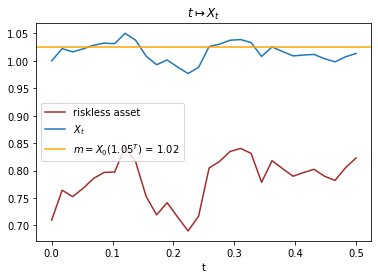

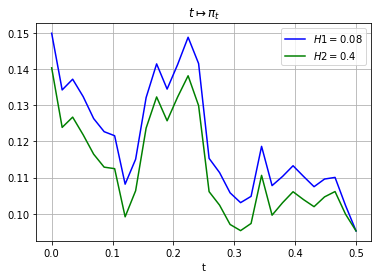

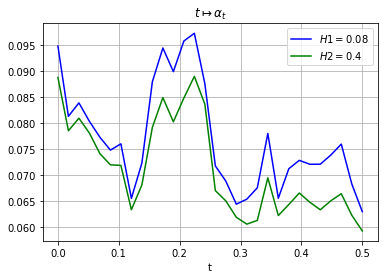

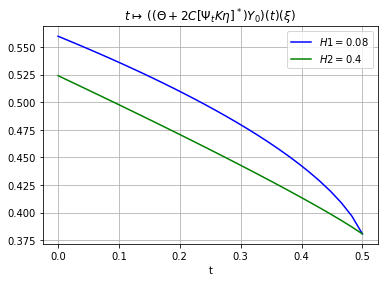

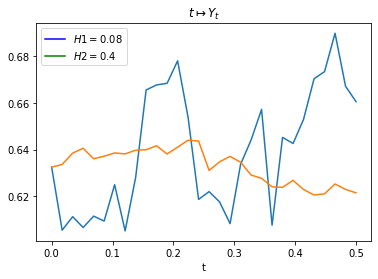

In [ ]:
P = Portfolio(rho=0, H1=0.08, H2=0.4, T=0.5, eta1=1)
P.plot_portfolio()

### $T \approx 1$ <a name="interT"></a>

Phi0_ =  -0.3938710090824875
xi =  [[1.14640138]]


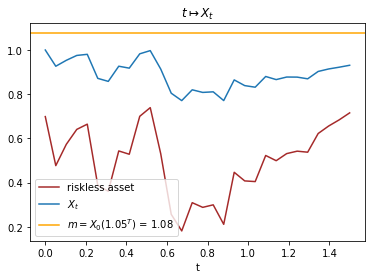

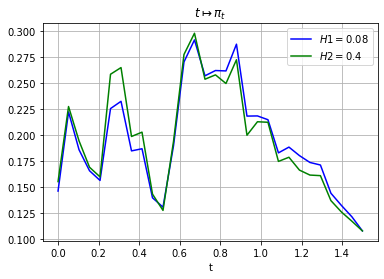

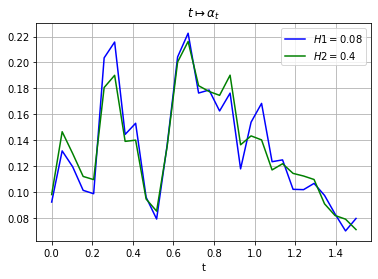

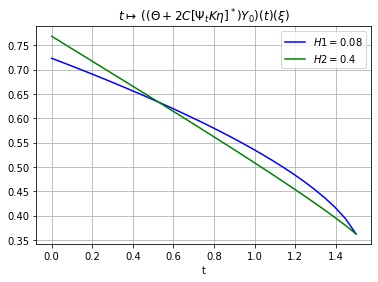

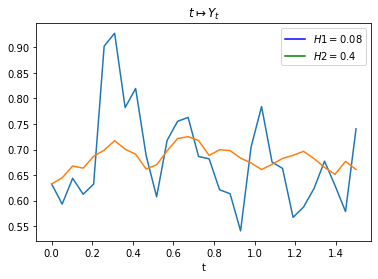

In [ ]:
P = Portfolio(rho=0, H1=0.08, H2=0.4, T=1.5, eta1=1)
P.plot_portfolio() 

### $T \gg 1$ <a name="bigT"></a>




Phi0_ =  -1.3473493557252312
xi =  [[1.14294443]]


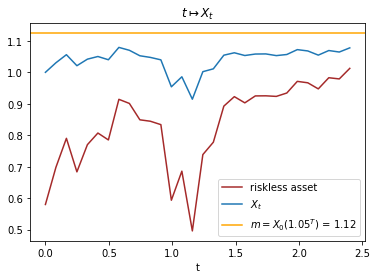

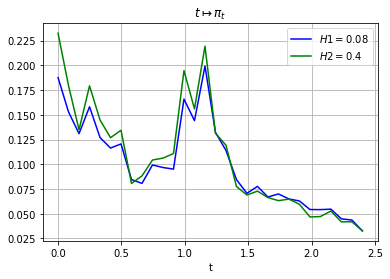

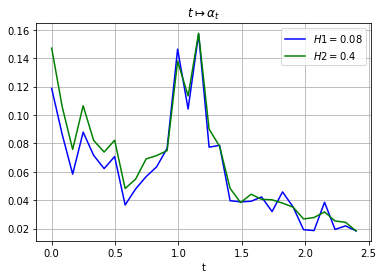

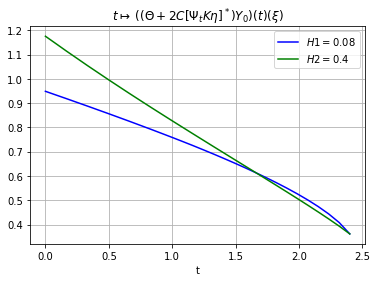

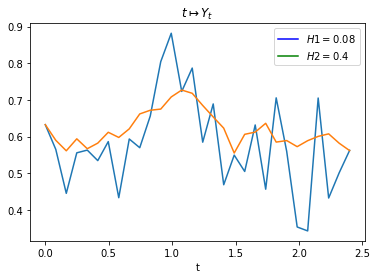

In [ ]:
P = Portfolio(rho=0, H1=0.08, H2=0.4, T=2.4, eta1=1) # 2.8
P.plot_portfolio()

## Adding correlation $\rho \neq 0$ between stocks <a name="correl"></a>
### $\rho >0$ <a name="correl_pos"></a>
Here we show that if ones have two similar stocks, in the sense they are positively correlated, then it applying the "Buy rough Sell smooth" (see [this paper](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3301669) from Glasserman) strategy is the optimal one. 

 ######### T =  0.5 eta1 =  1 rho =  0.7
Phi0_ =  -0.046473103027620984
xi =  [[1.24577743]]


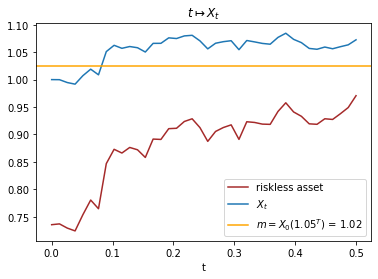

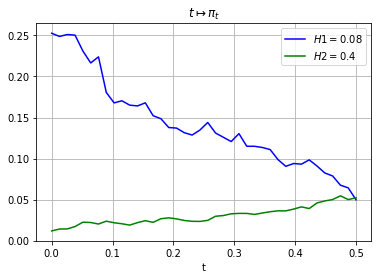

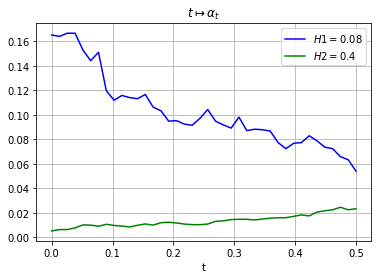

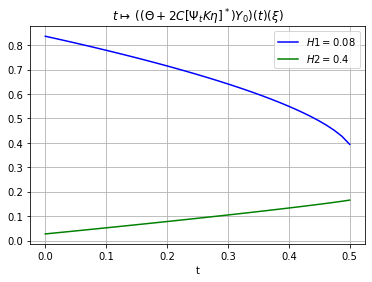

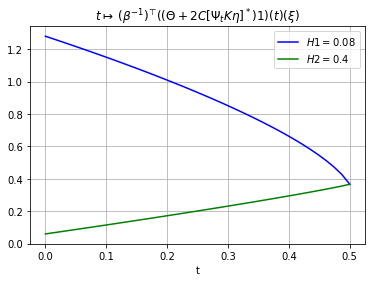

 ######### T =  1.5 eta1 =  1 rho =  0.7
Phi0_ =  -0.6143261262333273
xi =  [[1.1360646]]


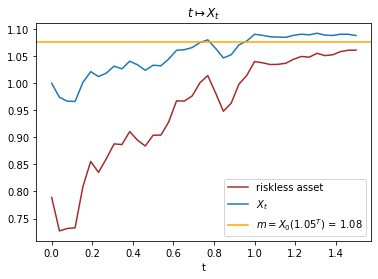

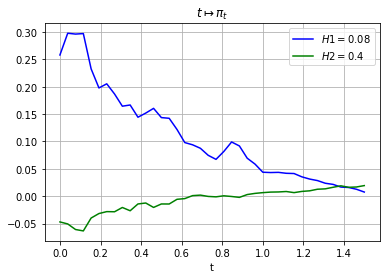

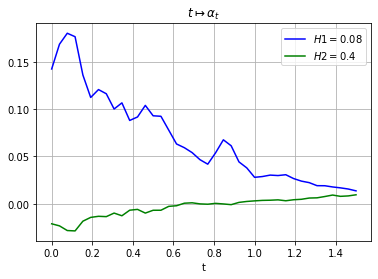

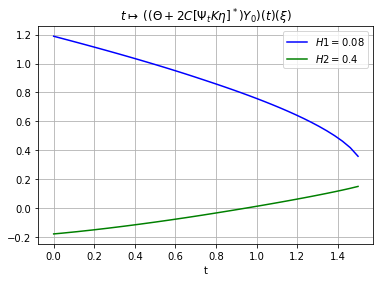

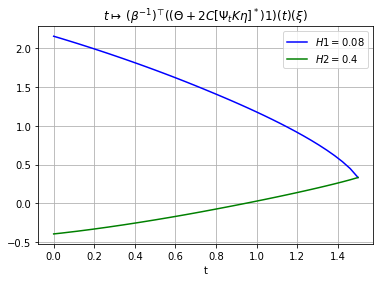

 ######### T =  2 eta1 =  1 rho =  0.7
Phi0_ =  -1.2544232075173973
xi =  [[1.12700083]]


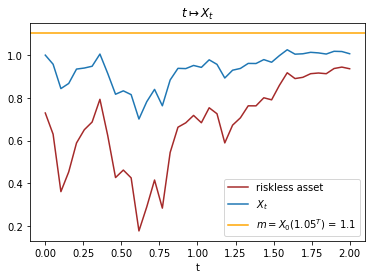

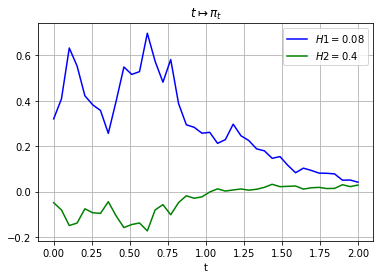

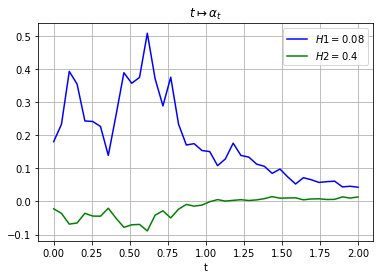

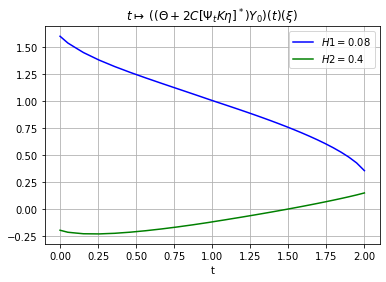

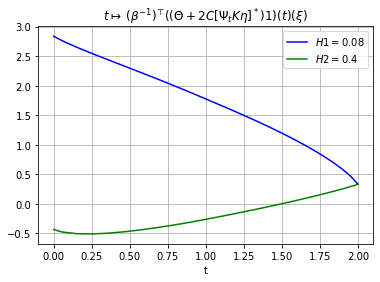

In [ ]:
for T in [0.5, 1.5, 2]: 
  print(" ######### T = ", T, "eta1 = ", 1, "rho = ", 0.7)
  P = Portfolio(rho=0.7, H1=0.08, H2=0.4, T=T, eta1=1)
  P.plot_portfolio() 

### $\rho <0$ <a name="correl_neg"></a>

 ######### T =  0.5 eta1 =  1 rho =  -0.3
Phi0_ =  -0.031350551613013165
xi =  [[1.1536124]]


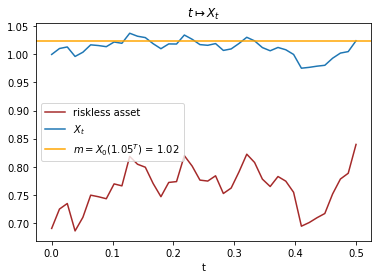

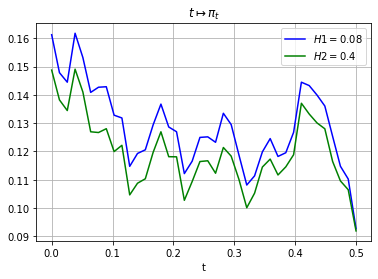

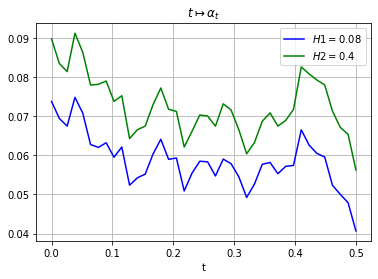

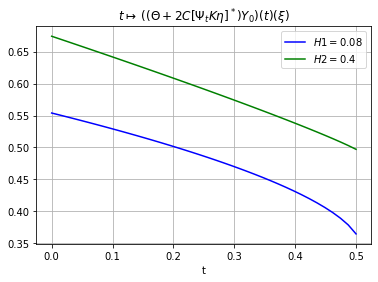

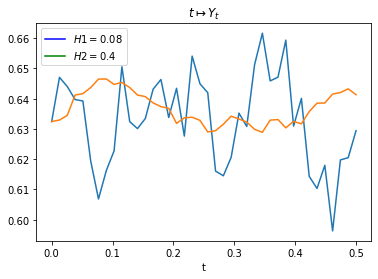

 ######### T =  1 eta1 =  1 rho =  -0.3
Phi0_ =  -0.1607305539225173
xi =  [[1.136554]]


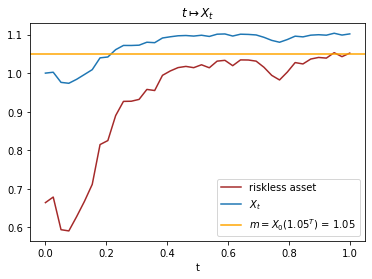

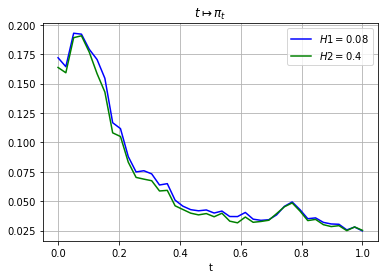

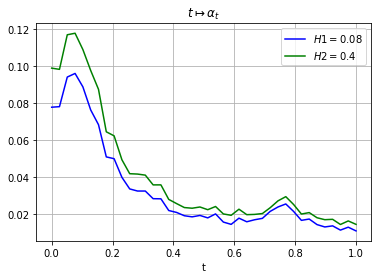

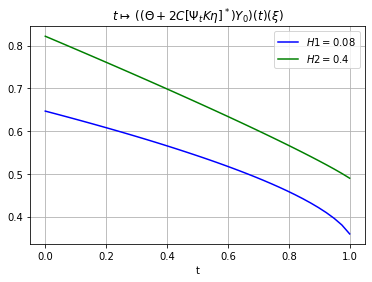

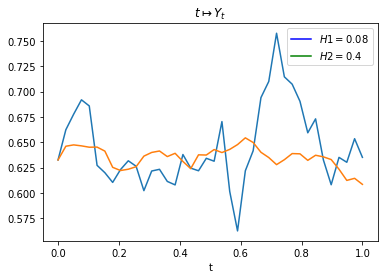

 ######### T =  2 eta1 =  1 rho =  -0.3
Phi0_ =  -0.8942794989214835
xi =  [[1.12843884]]


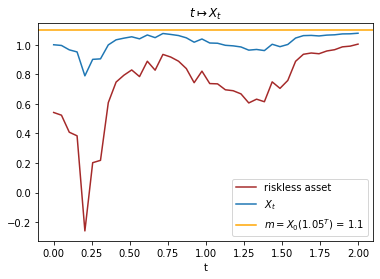

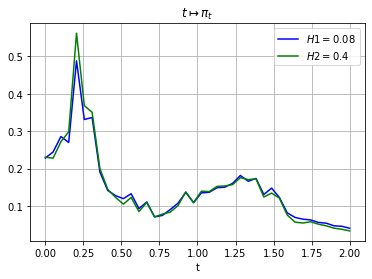

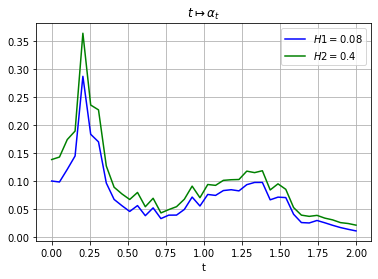

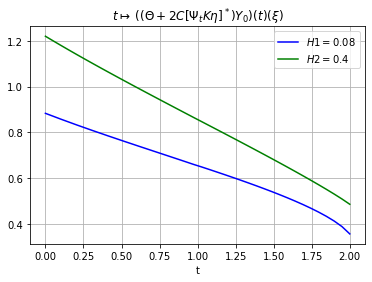

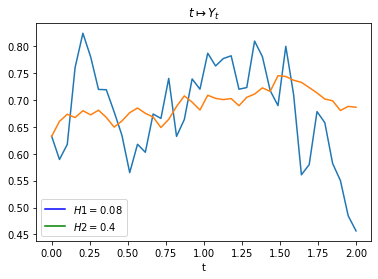

In [ ]:
for T in [0.5, 1, 2]:
  for rho in [-0.3]:
    print(" ######### T = ", T, "eta1 = ", 1, "rho = ", rho)
    P = Portfolio(rho=rho, H1=0.08, H2=0.4, T=T, eta1=1)
    P.plot_portfolio() 

 ######### T =  2.4 eta1 =  1 rho =  -0.4
Phi0_ =  -1.5365259655589631
xi =  [[1.12869893]]


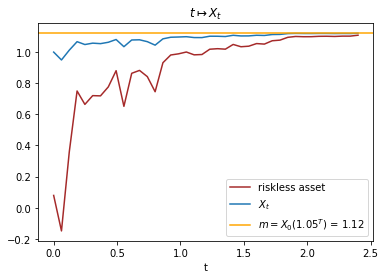

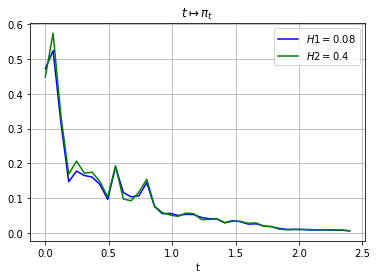

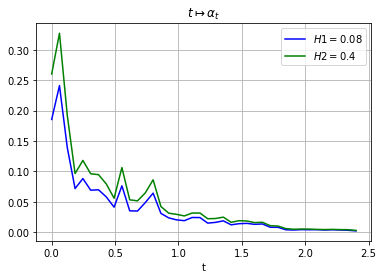

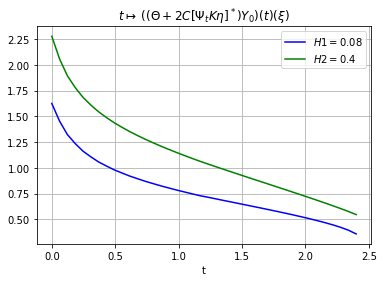

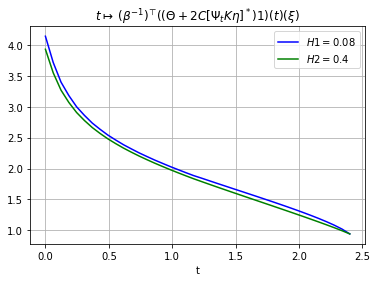

In [ ]:
for T in [2.4]:
  for rho in [-0.4]: #[-0.2]:
    print(" ######### T = ", T, "eta1 = ", 1, "rho = ", rho)
    P = Portfolio(rho=rho, H1=0.08, H2=0.4, T=T, eta1=1)
    P.plot_portfolio()

## Influence of the vol of vol $\eta$ <a name="volvol"></a>
We now study the influence of the vol of vol parameter $\eta$. We show that the bigger the $\eta$ the more prefered the rough stock is. We interpret this as if increasing $\eta$ was similar to deacreasing $T$, thus making the investor more inclined toward the rough stock.
>__Note that in the following we set $\rho = 0$, which means that there won't be any correlation between the stocks__ 

### $\eta \ll 1$ <a name="small_eta"></a>

Phi0_ =  -8.613567879691073e-05
xi =  [[1.31430496]]


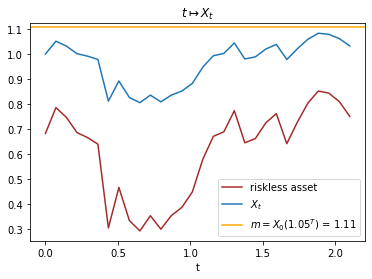

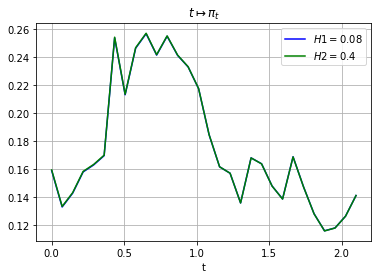

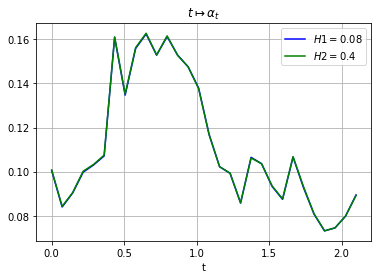

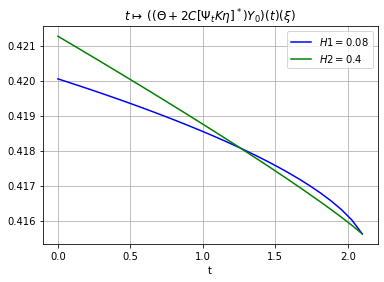

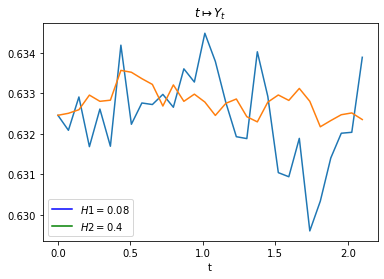

In [ ]:
eta = 0.01
T = 2.1
P = Portfolio(rho=0, H1=0.08, H2=0.4, T=T, eta1=eta)
P.plot_portfolio()

### $\eta \gg 1$ <a name="big_eta"></a>

Phi0_ =  -3.223656525183014
xi =  [[1.10460484]]


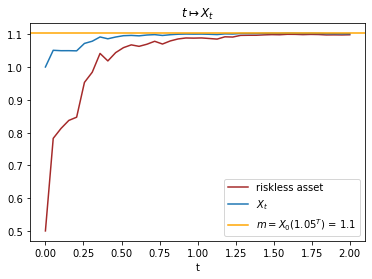

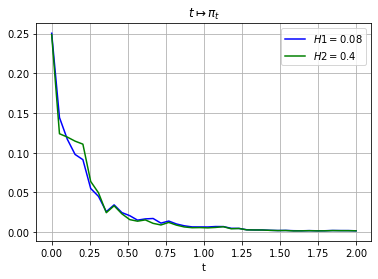

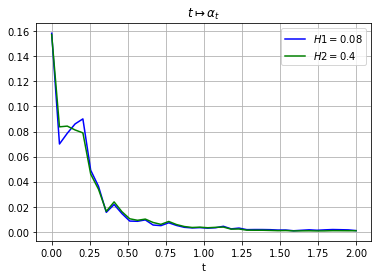

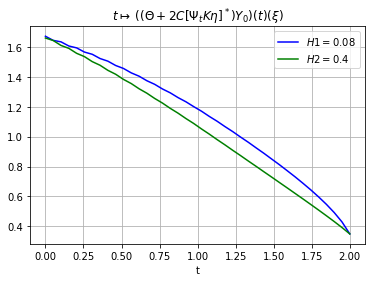

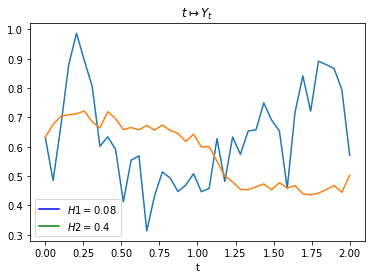

In [ ]:
eta = 1.8
T = 2
P = Portfolio(rho=0, H1=0.08, H2=0.4, T=T, eta1=eta)
P.plot_portfolio()

In [ ]:
def plot_(x, dictionary_y, label_x, label_y, title):
  n = len(dictionary_y)
  color=iter(cm.rainbow(np.linspace(0,1,n)))
  for key, value in dictionary_y.items():
    c=next(color)
    plt.plot(x, value, c=c)
    plt.plot([],[], c=c, label=key)
  plt.legend(loc='best')
  plt.xlabel(label_x)
  plt.ylabel(label_y)
  plt.title(title)
  plt.grid()
  plt.savefig('efficient_frontier.pdf')
  files.download('efficient_frontier.pdf') 
  plt.show()

## Efficient frontier <a name="frontier"></a>

Here we study the influence of the length of the experiment, i.e. the size of $T$, on the efficient frontier : 
\begin{equation}
  V(m) \; = \;    \mathbb{V} (X_T^*) \; = \;  \big|x_0 - m  \big|^2 \frac{\Gamma_0}{1 - \Gamma_0 }.
\end{equation}

Note that since $\Gamma_0 \to 0$ when $T \to \infty$ we expect the efficient frontier to go to 0 when $T \to \infty$.

In the following we again show the reversing that appears as $T$ grows and passes a threshold.

>__Note that in the following we set $\rho = 0$, which means that there won't be any correlation between the stocks.__ 

Phi0_ =  -0.034551200834142634
Gamma_0(T=0.5, H1=0.1, H2=0.1) =  [[0.87242204]]
Phi0_ =  -0.022957798173022997
Gamma_0(T=0.5, H1=0.25, H2=0.25) =  [[0.88290337]]
Phi0_ =  -0.01692158483343156
Gamma_0(T=0.5, H1=0.35, H2=0.35) =  [[0.88845458]]
Phi0_ =  -0.01043733600253845
Gamma_0(T=0.5, H1=0.5, H2=0.5) =  [[0.89450807]]


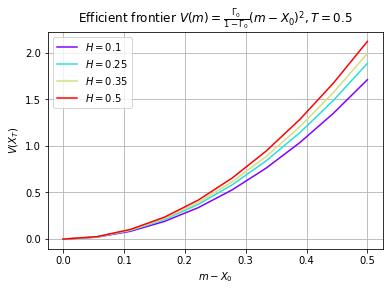

Phi0_ =  -0.406520828659646
Gamma_0(T=1.5, H1=0.1, H2=0.1) =  [[0.4683008]]
Phi0_ =  -0.37704583017956916
Gamma_0(T=1.5, H1=0.25, H2=0.25) =  [[0.48171406]]
Phi0_ =  -0.34611532483300744
Gamma_0(T=1.5, H1=0.35, H2=0.35) =  [[0.49770788]]
Phi0_ =  -0.29580414853268777
Gamma_0(T=1.5, H1=0.5, H2=0.5) =  [[0.52582127]]


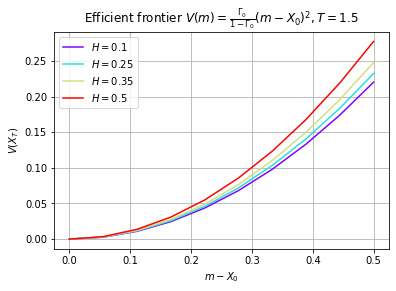

Phi0_ =  -0.7065007135386693
Gamma_0(T=1.9, H1=0.1, H2=0.1) =  [[0.30168815]]
Phi0_ =  -0.7081783044176987
Gamma_0(T=1.9, H1=0.25, H2=0.25) =  [[0.29786861]]
Phi0_ =  -0.6830438789354129
Gamma_0(T=1.9, H1=0.35, H2=0.35) =  [[0.30519457]]
Phi0_ =  -0.626745056292498
Gamma_0(T=1.9, H1=0.5, H2=0.5) =  [[0.32458656]]


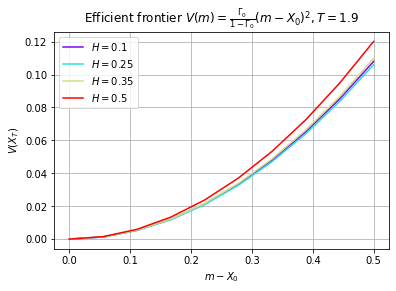

Phi0_ =  -1.8391646081861344
Gamma_0(T=2.8, H1=0.1, H2=0.1) =  [[0.06016342]]
Phi0_ =  -2.1398980398607064
Gamma_0(T=2.8, H1=0.25, H2=0.25) =  [[0.04008241]]
Phi0_ =  -2.263225935779694
Gamma_0(T=2.8, H1=0.35, H2=0.35) =  [[0.03392538]]
Phi0_ =  -2.3560099682843636
Gamma_0(T=2.8, H1=0.5, H2=0.5) =  [[0.03004357]]


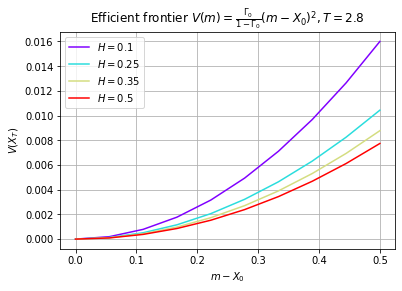

In [ ]:
title = r"Efficient frontier $V(m) = \frac{\Gamma_0}{1-\Gamma_0} (m-X_0)^2, T=$"
xlabel = r'$m - X_0$'
ylabel = r'$V(X_T)$'
delta_X0_mean = np.linspace(0,0.5,10)

for T in [0.5, 1.5, 1.9, 2.8]:
  dic = {}
  for H in [0.1, 0.25, 0.35, 0.5]:
    P = Operator(rho=0, H1=H, H2=H, T=T, eta1=1)
    efficient_frontier = P.efficient_frontier(delta_X0_mean)
    dic[r"$H=$"+str(H)] = efficient_frontier
  plot_(delta_X0_mean, dic, xlabel, ylabel, title + str(T))